# **Modelling and Evaluating**

## Objectives

- Answer business requirement 2:
    - The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

- Image shape are located in a pickle file.
- Images from the test, train, validation folders and their subfolders.

## Outputs

- Image and label distribution plot:
    - Bar chart showing the number of images per label in the train, validation, and test sets.
    - Pie chart showing the percentage of images in each set.
- Image augmentation:
    -Plot showing a sample of augmented images for each set.
- Class indices:
    -A dictionary of class indices is to be used for prediction inference on the labels.
- Model creation and summary:
    - Creation of a machine learning model and display of its outline.
- Model training:
    - Train the model using the train set and validate on the validation set.
- Save model:
    - Save the trained model.
- Learning curve plot:
    - The plot of model performance on the train and validation set.
- Model evaluation:
    - Evaluate the model performance on the test set.
    - Calculate accuracy and plot the ROC curve.
    - Classification report:
        - For Model A: overall accuracy and per-class precision, recall, and F1 score.
        - For Model B: classification report with macro avg and weighted avg.
        - For Model C: synthetic classification report per label.
    - Plot confusion matrix.
    - Save evaluation results as a pickle file.
- Prediction on a random image file:
    - Predict the label of a random image file using the trained model.


---

### Import packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread
import joblib

---

### Set working directory

In [2]:
cwd = os.getcwd()

In [4]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

---

## Set input directories

Set train, validation and test paths

In [6]:
my_data_dir = os.path.abspath('inputs/cherryleaves_dataset/cherry-leaves')
train_path = os.path.join(my_data_dir, 'train') 
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

## Set output directory

In [7]:
# Set output directory and version
version = 'v1'
file_path = os.path.abspath(f'outputs/{version}')

# Create output directory if not exists
if not os.path.exists(file_path):
    os.makedirs(file_path)
else:
    print(f'{version} already exists. Creating a new version.')

v1 already exists. Creating a new version.


## Set Label names

In [8]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


### Set image shape

In [9]:
with open(f"{file_path}/image_shape.pkl", 'rb') as f:
    image_shape = joblib.load(f)

    print('Labels for the images are,', image_shape)

Labels for the images are, (256, 256, 3)


---

### Images distribution

Count number of images per set and label

In [13]:
import os
import kaleido
import plotly.express as px
import plotly.io as pio

# Set the data directory
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'

# Define the train, validation, and test paths
train_path = os.path.join(my_data_dir, 'train') 
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

# Get the list of labels
labels = os.listdir(train_path)

# Create a DataFrame to store the image distribution and count per set and label
df_freq = pd.DataFrame([])

# Iterate over the sets and labels and count the number of images
for folder in ['train', 'test', 'validation']:
    for label in labels:
        try:
            count = len(os.listdir(os.path.join(my_data_dir, folder, label)))
        except:
            count = None
        df_freq = df_freq.append(pd.Series({
            'Set': folder,
            'Label': label,
            'Count': count
        }), ignore_index=True)

# Print the image distribution and count per set and label
for folder in ['train', 'test', 'validation']:
    print(f"{folder.capitalize()} set:")
    print(df_freq[df_freq['Set']==folder].to_string(index=False, header=False, justify='center'))
    print("\n")


# Plot the image distribution and count per set and label using Plotly
import plotly.express as px
import plotly.io as pio

fig = px.sunburst(df_freq, path=['Set', 'Label'], values='Count')
fig.show()

# Save the image to the file path as a PNG with a width of 800 pixels and height of 600 pixels
pio.write_image(fig, f"{file_path}/img_distribution.png", width=800, height=600, format='png')


Train set:
 1472.0         healthy  train
 1472.0  powdery_mildew  train


Test set:
 422.0         healthy  test
 422.0  powdery_mildew  test


Validation set:
 210.0         healthy  validation
 210.0  powdery_mildew  validation




---

## Image data augmentation

Import necessary libraries.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- Define the image data generator with augmentation techniques.

In [15]:
train_datagen = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10,
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

- Set batch size.

In [16]:
batch_size = 32
color_mode = 'rgb'
class_mode = 'binary'

#### Plot augmented training image set.

In [17]:
train_set = train_datagen.flow_from_directory(train_path,
                                              target_size=image_shape[:2],
                                              color_mode=color_mode,
                                              batch_size=batch_size,
                                              class_mode=class_mode,
                                              shuffle=True,
                                              seed=42)
val_set = val_datagen.flow_from_directory(val_path,
                                           target_size=image_shape[:2],
                                           color_mode=color_mode,
                                           batch_size=batch_size,
                                           class_mode=class_mode,
                                           shuffle=False)
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode=color_mode,
                                                                  batch_size=batch_size,
                                                                  class_mode=class_mode,
                                                                  shuffle=False
                                                                  )



# Print class indices
print(f"Class indices: {train_set.class_indices}")

Found 2944 images belonging to 2 classes.
Found 420 images belonging to 2 classes.
Found 844 images belonging to 2 classes.
Class indices: {'healthy': 0, 'powdery_mildew': 1}


(32, 256, 256, 3)


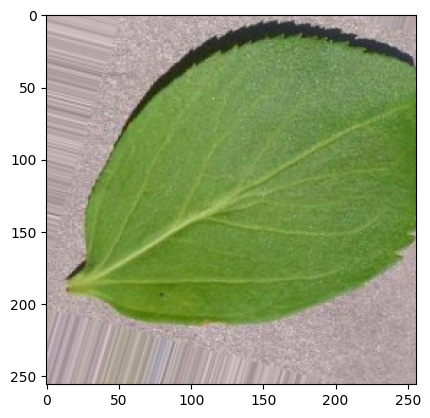

(32, 256, 256, 3)


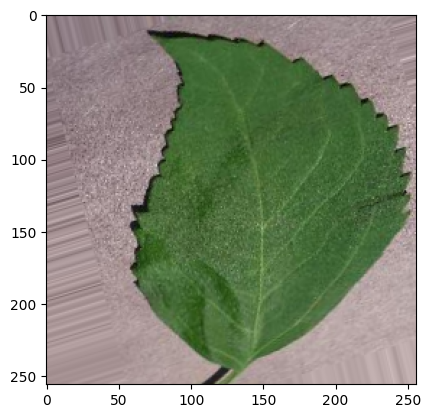

(32, 256, 256, 3)


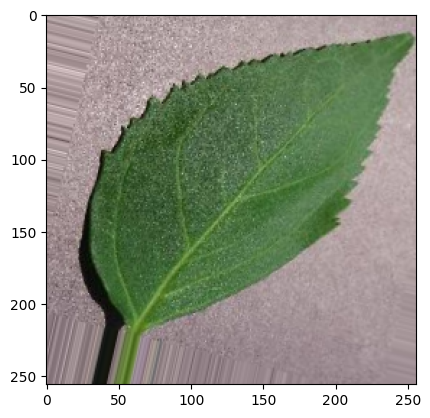

In [18]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

In [19]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

NameError: name 'validation_set' is not defined

(32, 256, 256, 3)


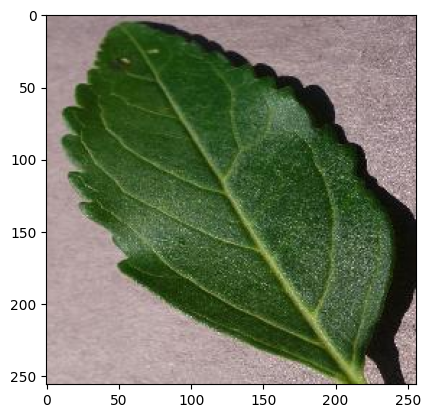

(32, 256, 256, 3)


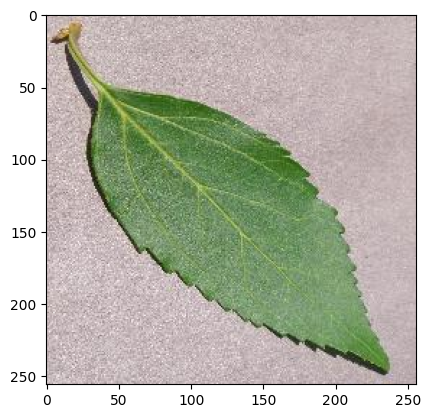

(32, 256, 256, 3)


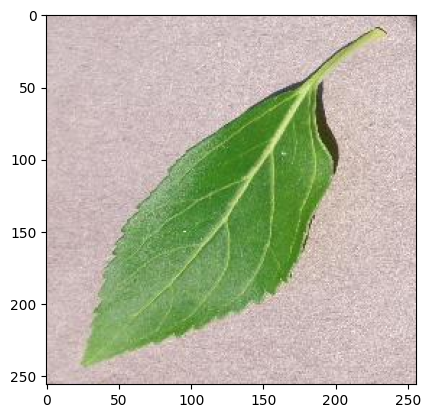

In [20]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  # (1,256,256,3)
    plt.imshow(img[0])
    plt.show()

In [21]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['/workspace/mildew-detector/outputs/v1/class_indices.pkl']

In [22]:
# Save class_indices
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['/workspace/mildew-detector/outputs/v1/class_indices.pkl']

---

## Model Creation

The modelused is the Convolutional Neural Network (CNN) which will learn from the dorminant feature (the powdery mildew) of the pre-labeled cherry leaf image.

#### Machine Learning Model

Import packages

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))


2023-04-14 21:56:05.717468: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Compile the model

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Define callbacks

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min')
checkpoint = ModelCheckpoint(filepath=os.path.join(file_path, 'mildew_detector_model.h5'),
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='max',
                             verbose=1)

In [28]:
history = model.fit(train_set,
                    validation_data=val_set,
                    epochs=50,
                    callbacks=[early_stopping, reduce_lr, checkpoint])


2023-04-14 21:56:19.550549: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
92/92 [==============================] - 174s 2s/step - loss: 0.4494 - accuracy: 0.8043 - val_loss: 0.1064 - val_accuracy: 0.9833

Epoch 00001: val_accuracy improved from -inf to 0.98333, saving model to /workspace/mildew-detector/outputs/v1/mildew_detector_model.h5
Epoch 2/50
92/92 [==============================] - 180s 2s/step - loss: 0.0890 - accuracy: 0.9711 - val_loss: 0.0387 - val_accuracy: 0.9905

Epoch 00002: val_accuracy improved from 0.98333 to 0.99048, saving model to /workspace/mildew-detector/outputs/v1/mildew_detector_model.h5
Epoch 3/50
92/92 [==============================] - 171s 2s/step - loss: 0.0378 - accuracy: 0.9901 - val_loss: 0.0428 - val_accuracy: 0.9905

Epoch 00003: val_accuracy did not improve from 0.99048
Epoch 4/50
92/92 [==============================] - 208s 2s/step - loss: 0.0337 - accuracy: 0.9908 - val_loss: 0.0683 - val_accuracy: 0.9857

Epoch 00004: val_accuracy did not improve from 0.99048
Epoch 5/50
92/92 [=============================

In [29]:
test_loss, test_acc = model.evaluate(test_set)

print(f"Test loss: {test_loss:.2f}")
print(f"Test accuracy: {test_acc:.2%}")

27/27 [==============================] - 13s 458ms/step - loss: 7.5743e-04 - accuracy: 1.0000
Test loss: 0.00
Test accuracy: 100.00%


Plot the training and validation loss and accuracy

model preform

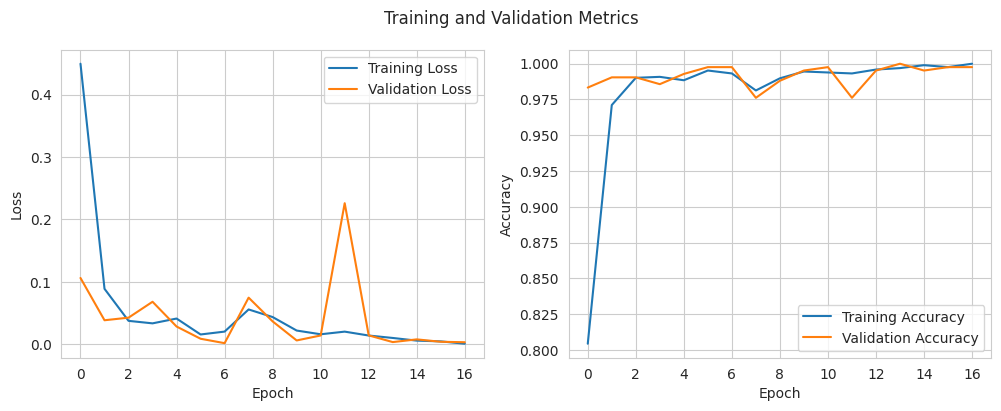

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Training and Validation Metrics')

axs[0].plot(history.history['loss'], label='Training Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].legend()
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')

axs[1].plot(history.history['accuracy'], label='Training Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].legend()
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')

plt.show()

Save the model architecture

In [31]:
with open(os.path.join(file_path, 'model_architecture.json'), 'w') as f:
    f.write(model.to_json())

Evaulation

In [36]:
from keras.models import load_model
model = load_model(f'{file_path}/mildew_detector_model.h5')

In [37]:
evaluation = model.evaluate(test_set)

27/27 [==============================] - 11s 389ms/step - loss: 0.0025 - accuracy: 0.9988


In [38]:
joblib.dump(value=evaluation, filename=f'{file_path}/evaluation.pk1')

['/workspace/mildew-detector/outputs/v1/evaluation.pk1']

---

Predict on new data

Image shape: (256, 256), Image mode: RGB


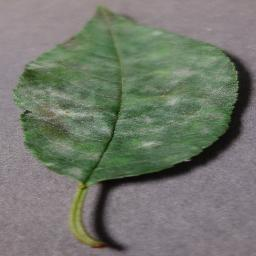

In [39]:
from tensorflow.keras.preprocessing import image

pointer = 80
label = labels[1] # select from the powdery mildew leaf
img = os.listdir(f'{test_path}/{label}')[pointer]
file_to_load = os.path.join(test_path, label, img)

pil_image = image.load_img(file_to_load, target_size = image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array for prediction

In [40]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


Predict class probabilities

In [41]:
prediction_probability = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
predicted_class =  target_map[prediction_probability > 0.5]  

if predicted_class == target_map[0]: prediction_probability = 1 - prediction_probability

print(f'Prediction probability: {prediction_probability}')
print(f'Predicted class: {predicted_class}')

Prediction probability: 1.0
Predicted class: powdery_mildew


---

### Push files to repo

- .gitignore

In [42]:
!cat .gitignore

core.Microsoft*
core.mongo*
core.python*
env.py
__pycache__/
*.py[cod]
node_modules/
.github/
cloudinary_python.txt
kaggle.json

- git status

In [43]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   jupyter_notebooks/ModellingEvaluating.ipynb
	deleted:    outputs/v1/best_model.h5
	modified:   outputs/v1/evaluation.pk1
	deleted:    outputs/v1/final_model.h5
	modified:   outputs/v1/mildew_detector_model.h5

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	outputs/v1/model_architecture.json

no changes added to commit (use "git add" and/or "git commit -a")


- git add

In [44]:
!git add .

- git commit

In [ ]:
!git commit 